# Louisville Free Public Library

## YA Collection Graphs

In [22]:
import pandas as pd
import matplotlib

books = pd.read_csv("data/clean/books-clean.csv.gz")
books

,BibNum,Title,Author,PublicationYear,ItemType,ItemCollection,ItemLocation,ItemPrice,Genre,Audience,Author_Name_Clean
0,707409,"Jeff Immelt and the new GE way : innovation, t...","Magee, David, 1965",2009,Book,Adult Non-Fiction,Main,25.95,Non-Fiction,Adult,David Magee
1,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964",2009,Book,Adult Non-Fiction,Southwest,19.99,Non-Fiction,Adult,Robin Miller
2,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964",2009,Book,Adult Non-Fiction,Southwest,19.99,Non-Fiction,Adult,Robin Miller
3,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964",2009,Book,Adult Non-Fiction,Remote Shelving - Main,19.99,Non-Fiction,Adult,Robin Miller
4,707411,Robin rescues dinner : 52 weeks of quick-fix m...,"Miller, Robin, 1964",2009,Book,Adult Non-Fiction,Remote Shelving - Main,19.99,Non-Fiction,Adult,Robin Miller
...,...,...,...,...,...,...,...,...,...,...,...
1187198,2608597,25 ready-to-use sustainable living programs fo...,NaN,2022,Book,Adult Non-Fiction,South Central,63.69,Non-Fiction,Adult,NaN
1187199,2608598,Crypto basics : a nontechnical introduction to...,"Gomzin, Slava",2022,Book,Adult Non-Fiction,Bon Air,30.09,Non-Fiction,Adult,Slava Gomzin
1187200,2608598,Crypto basics : a nontechnical introduction to...,"Gomzin, Slava",2022,Book,Adult Non-Fiction,Newburg,30.09,Non-Fiction,Adult,Slava Gomzin
1187201,2608599,Data governance,"Reichental, Jonathan",2023,Book,Adult Non-Fiction,Main,24.34,Non-Fiction,Adult,Jonathan Reichental


In [23]:
authors = pd.read_csv("data/raw/authors.csv")
authors

,Unnamed: 0,Name
0,1,Atia Abawi
1,2,Joan Abelove
2,3,Hailey Abbott
3,4,Faridah Àbíké-Íyímídé
4,5,Marguerite Abouet
...,...,...
631,632,Xiran Jay Zhao
632,633,Cecily von Ziegesar
633,634,Paul Zindel
634,635,Ibi Zoboi


In [24]:
authors['Num_Books'] = authors['Name'].map(books['Author_Name_Clean'].value_counts())
authors['Num_Books'] = authors['Num_Books'].fillna(0)
authors

,Unnamed: 0,Name,Num_Books
0,1,Atia Abawi,7.0
1,2,Joan Abelove,0.0
2,3,Hailey Abbott,0.0
3,4,Faridah Àbíké-Íyímídé,0.0
4,5,Marguerite Abouet,0.0
...,...,...,...
631,632,Xiran Jay Zhao,6.0
632,633,Cecily von Ziegesar,0.0
633,634,Paul Zindel,8.0
634,635,Ibi Zoboi,22.0


## What percentage of all YA authors are represented in the LFPL collection?

In [25]:
num_authors_in_collection = len(authors[authors['Num_Books'] > 0])
num_authors_missing = len(authors[authors['Num_Books'] == 0])
percent_authors_represented = round((num_authors_in_collection / (num_authors_in_collection + num_authors_missing) * 100),2)

print(f'The Louisville Public Library has books from {percent_authors_represented}% of all Young Adult Authors.')

The Louisville Public Library has books from 50.31% of all Young Adult Authors.


<Axes: ylabel='Percent'>

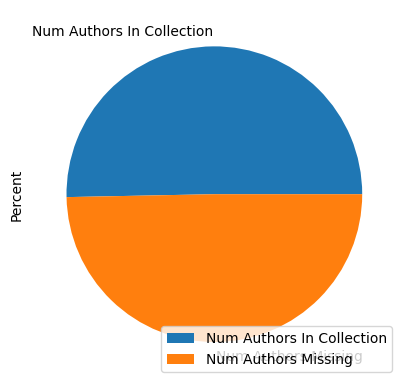

In [36]:
ya_percents = pd.DataFrame({'Percent': [num_authors_in_collection, num_authors_missing]}, 
                            index=['Num Authors In Collection', 'Num Authors Missing'])
ya_percents.plot(kind='pie', y=0)

## What are the most popular YA Authors?

<Axes: xlabel='Name'>

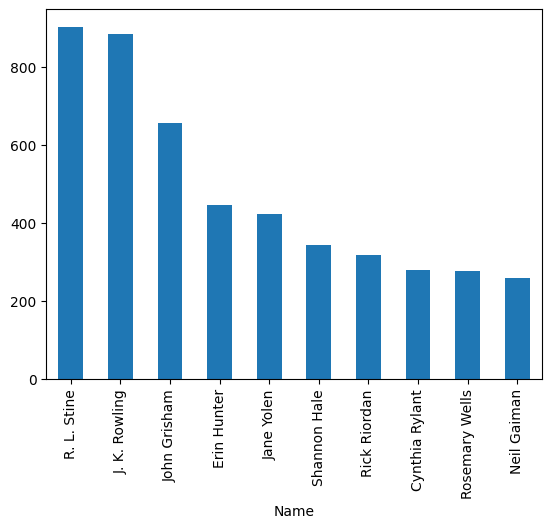

In [35]:
authors.sort_values(by=['Num_Books'], ascending=False).head(10).plot(kind='bar', 
                                                                        x='Name', 
                                                                        y='Num_Books', 
                                                                        legend=False, 
                                                                        title='Top Ten YA Authors by # Books')